# Project 2

(Dataset Link:
https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores )

● In which language were the long-run movies created according to the dataset?
Make a visualization.

● Taken between January 2019 and June 2020 in 'Documentary' type
Find and visualize the IMDB values ​​of the movies.

● Which genre has the highest IMDB rating among movies shot in English?

● What is the average 'runtime' of movies shot in 'Hindi'?

● How many categories does the 'Genre' Column have and what are these categories?
Express it visually.

● Find the 3 most used languages ​​in the movies in the data set.

● What are the top 10 movies with the highest IMDB rating?

● What is the correlation between IMDB score and 'Runtime'? review and
visualize it.

● Which are the top 10 'Genre' with the highest IMDB Score? Visualize it.

● What are the top 10 movies with the highest 'Runtime'? Visualize it.

● In which year was the most movies released? Visualize it.

● Which language movies have the lowest average IMBD ratings?
Visualize it.

● Which year has the greatest total runtime?

● What is the "Genre" where each language is used the most?

● Is there outlier data in the data set? Please explain

### Loading Dataset

In [4]:
import pandas as pd
dataset = pd.read_csv("NetflixOriginals.csv",  encoding='ISO-8859-1')
dataset.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


> We can access structural information such as how much space `df.info()` occupies in our dataset, and what data type the features are.

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Runtime,584.0,93.577055,27.761683,4.0,86.0,97.00,108.0,209.0
IMDB Score,584.0,6.271747,0.979256,2.5,5.7,6.35,7.0,9.0


> The df.describe() method gives descriptive optimism of numerics. These are count average, std, min and max values.

In [ ]:
dataset.astype('object').describe().T

,count,unique,top,freq
Title,584,584,Enter the Anime,1
Genre,584,115,Documentary,159
Premiere,584,390,"October 2, 2020",6
Runtime,584,124,97,24
IMDB Score,584.0,54.0,5.8,30.0
Language,584,38,English,401


> *df.describe() method gives descriptive statistical values ​​of numeric variables, we can use `astype('object')` to show categorical variables or values ​​other than numeric values. These are **count,unquie, top, freq** values.*

* count : shows how many data there are
* unquie : shows how many different types of data are in the variables in the data set
* top : is the observation with the most in the variable
* freq : shows how many repetitions of the most found observation

### Importing Libraries

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

##### **In which language were the long-run movies created according to the dataset? Make a visualization.**

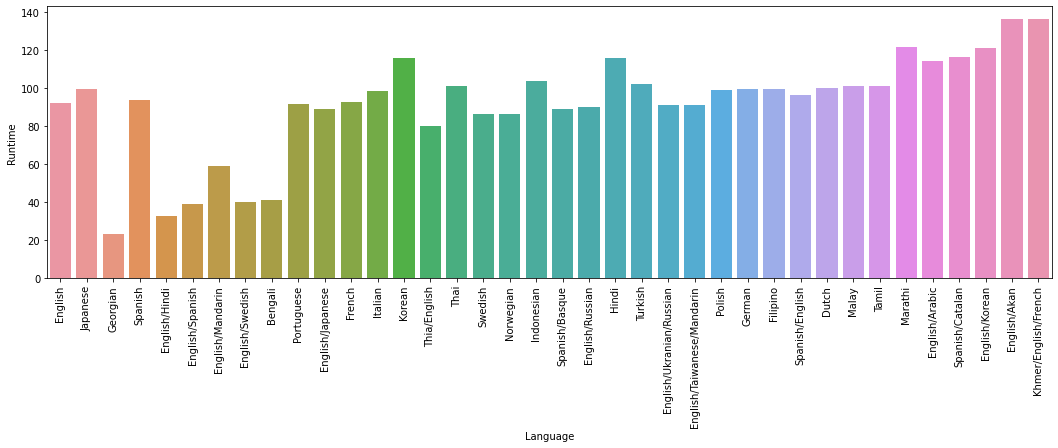

In [ ]:
sorted_df = dataset.sort_values('Runtime')
plt.figure(figsize = (18,5))
sns.barplot('Language' , 'Runtime' , data = sorted_df , ci = None)
plt.xticks(rotation = 90)
plt.show()

##### **Taken between January 2019 and June 2020 in 'Documentary' type Find and visualize the IMDB values ​​of the movies.**

In [ ]:
df = dataset.copy()
df["Date"] = pd.to_datetime(df.Premiere)
documents = df.loc[(df["Genre"] == "Documentary") & (df["Date"] > "2019-01-31") & (df["Date"] < "2020-06-01")]
documents.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019-08-05
15,After the Raid,Documentary,"December 19, 2019",25,4.3,Spanish,2019-12-19
20,"Hello Privilege. It's Me, Chelsea",Documentary,"September 13, 2019",64,4.4,English,2019-09-13
30,After Maria,Documentary,"May 24, 2019",37,4.6,English/Spanish,2019-05-24
111,Ghosts of Sugar Land,Documentary,October 16. 2019,21,5.5,English,2019-10-16


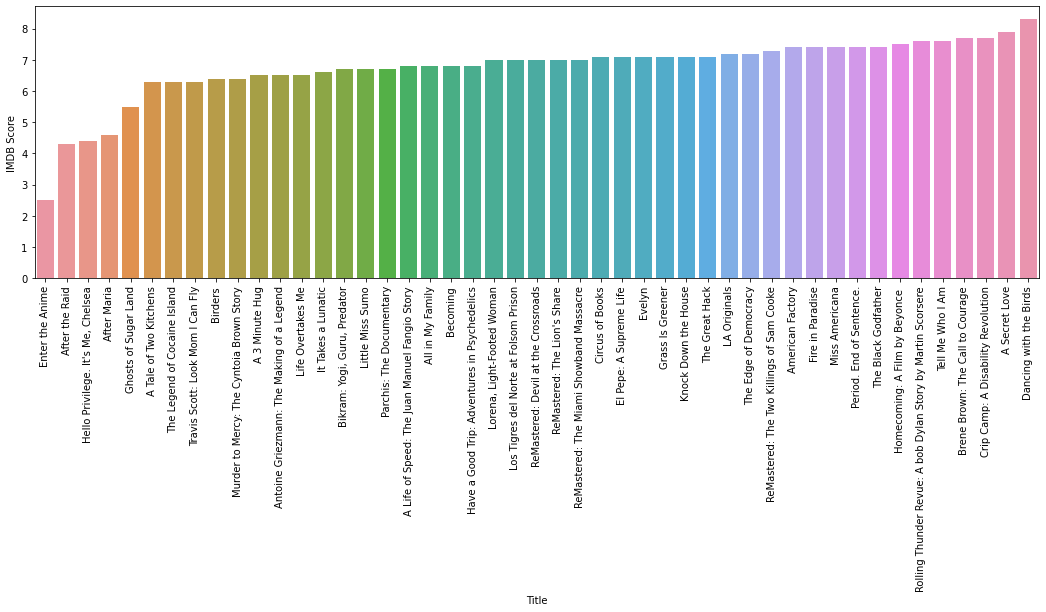

In [ ]:
plt.figure(figsize = (18,5))
sns.barplot('Title' , 'IMDB Score' , data = documents)
plt.xticks(rotation = 90)
plt.show()

#####  **Which genre has the highest IMDB rating among movies shot in English?**

In [ ]:
dataset[dataset['Language'] == 'English'].sort_values(by = ['IMDB Score']).tail(1)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English


##### **'What is the average 'runtime' of movies shot in 'Hindi'??**

In [ ]:
np.average(dataset[dataset['Language'] == 'Hindi']['Runtime'])

115.78787878787878

##### **How many categories does the 'Genre' Column have and what are these categories? Express it visually.**

In [ ]:
data_genre = pd.DataFrame(dataset['Genre'].value_counts())
data_genre

,Genre
Documentary,159
Drama,77
Comedy,49
Romantic comedy,39
Thriller,33
...,...
Romantic comedy-drama,1
Heist film/Thriller,1
Musical/Western/Fantasy,1
Horror anthology,1


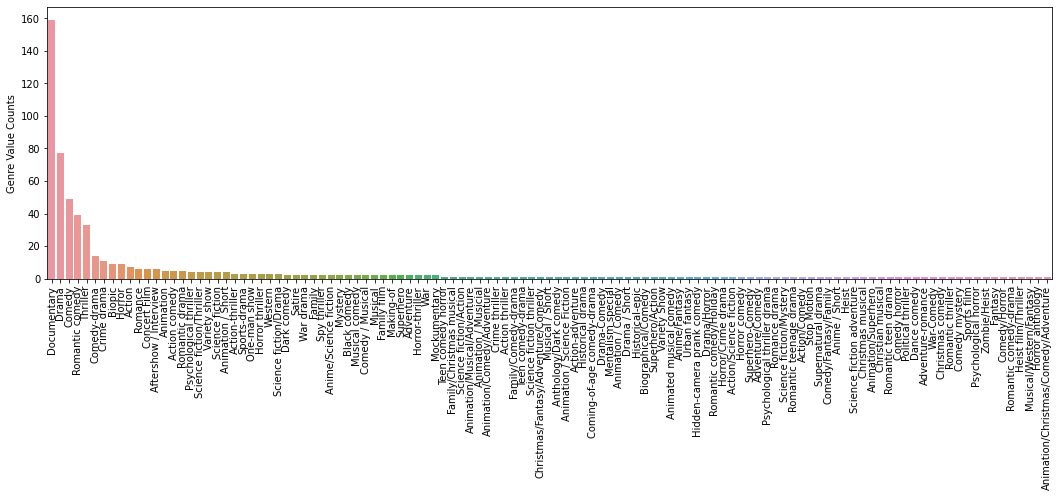

In [ ]:
plt.figure(figsize = (18,5))
sns.barplot(x = data_genre.index, y = data_genre['Genre'] , data = data_genre)
plt.ylabel("Genre Value Counts")
plt.xticks(rotation = 90)
plt.show()

##### **Find the 3 most used languages ​​in the movies in the data set.**

In [ ]:
dataset['Language'].value_counts()[:3]

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

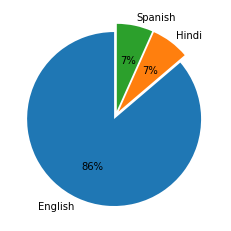

In [ ]:

values = list(dataset['Language'].value_counts()[0:3])
labels = list(dataset['Language'].value_counts().index[0:3])
explode = (0.05,0.05,0.05)
plt.pie(values , labels = labels
        , autopct='%.0f%%'
         ,startangle=90,
        explode = explode)
plt.show()

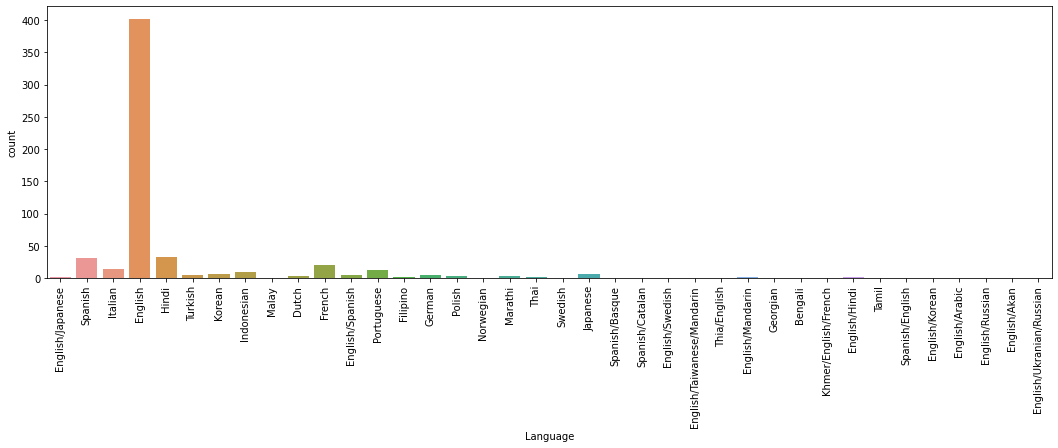

In [ ]:
plt.figure(figsize =(18,5))
sns.countplot(dataset['Language'] , dodge = False)
plt.xticks(rotation = 90)
plt.show()

*When we examine the graphic, it is seen that the 3 most used languages ​​in movies are **``English, Spanish and Hindi``**.*

##### **What are the top 10 movies with the highest IMDB rating?**

In [ ]:
dataset.sort_values(by = ['IMDB Score']).tail(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
571,13th,Documentary,"October 7, 2016",100,8.2,English
572,Disclosure: Trans Lives on Screen,Documentary,"June 19, 2020",107,8.2,English
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English


##### **What is the correlation between IMDB score and 'Runtime'? review and visualize it.**

In [ ]:
dataset.corr()[['IMDB Score','Runtime']]

,IMDB Score,Runtime
Runtime,-0.040896,1.000000
IMDB Score,1.000000,-0.040896


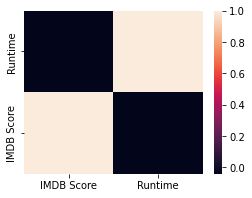

In [ ]:
plt.figure(figsize = (4,3))
sns.heatmap(dataset.corr()[['IMDB Score','Runtime']])
plt.show()

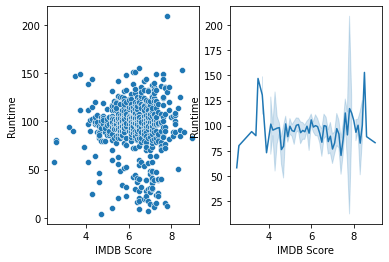

In [ ]:
fig, axs = plt.subplots(ncols=2)
sns.scatterplot(x = 'IMDB Score' , y = 'Runtime', data = dataset , ax = axs[0])
sns.lineplot(x = 'IMDB Score' , y = 'Runtime', data = dataset , ax = axs[1])
plt.show()

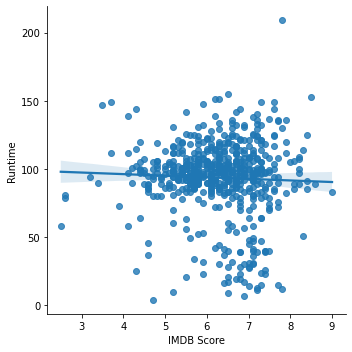

In [ ]:
sns.lmplot(x = 'IMDB Score' , y = 'Runtime', data = dataset)
plt.show()

##### **Which are the top 10 'Genre' with the highest IMDB Score? Visualize it.**

In [ ]:
sort_values = dataset.sort_values(by="IMDB Score", ascending=False).head(32)
px.scatter(sort_values, y= 'Title', x='IMDB Score', color='Genre')

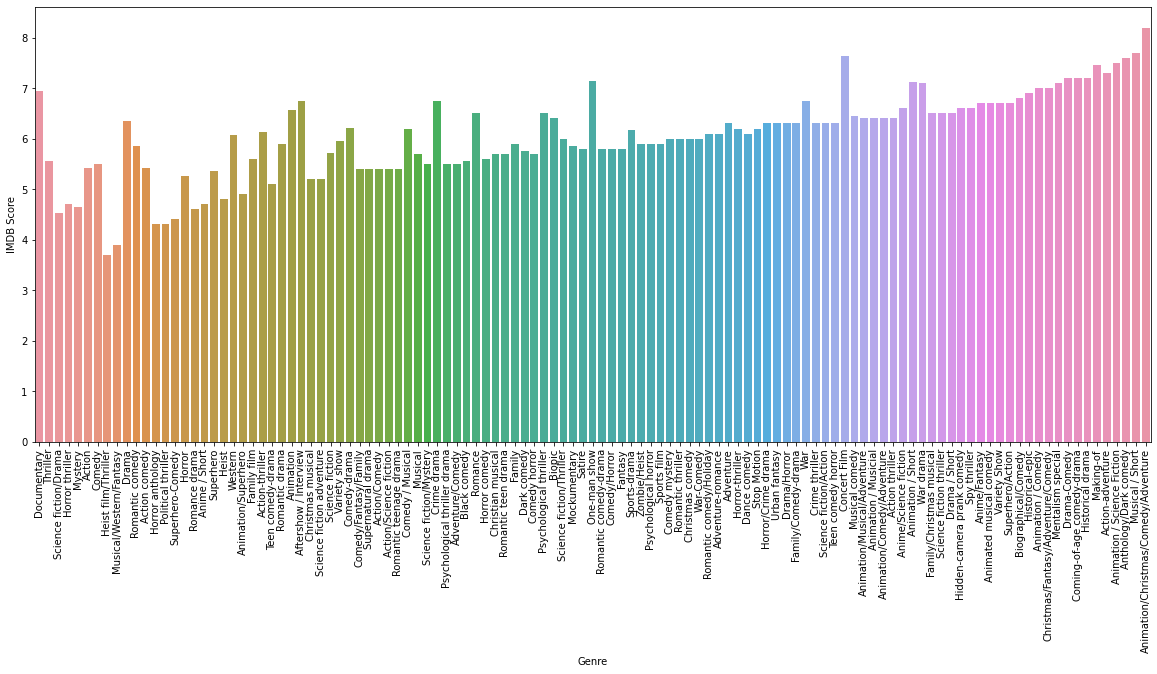

In [ ]:
plt.figure(figsize = (20,8))
sns.barplot(x = 'Genre' , y = 'IMDB Score' ,data = dataset , ci = None )
plt.xticks(rotation = 90)
plt.show()

*By looking at the chart above, we can see the 10 movie genres with the highest IMDB Score.*

##### **What are the top 10 movies with the highest 'Runtime'? Visualize it.**

In [ ]:
sorted_df_runtime = dataset.sort_values('Runtime' , ascending=False).head(10)
sorted_df_runtime

,Title,Genre,Premiere,Runtime,IMDB Score,Language
561,The Irishman,Crime drama,"November 27, 2019",209,7.8,English
328,Da 5 Bloods,War drama,"June 12, 2020",155,6.5,English
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
247,Citation,Drama,"November 6, 2020",151,6.2,English
284,The Forest of Love,Drama,"October 11, 2019",151,6.3,Japanese
509,Raat Akeli Hai,Thriller,"July 31, 2020",149,7.3,Hindi
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
543,Ludo,Anthology/Dark comedy,"November 12, 2020",149,7.6,Hindi
194,Army of the Dead,Zombie/Heist,"May 21, 2021",148,5.9,English
5,Drive,Action,"November 1, 2019",147,3.5,Hindi


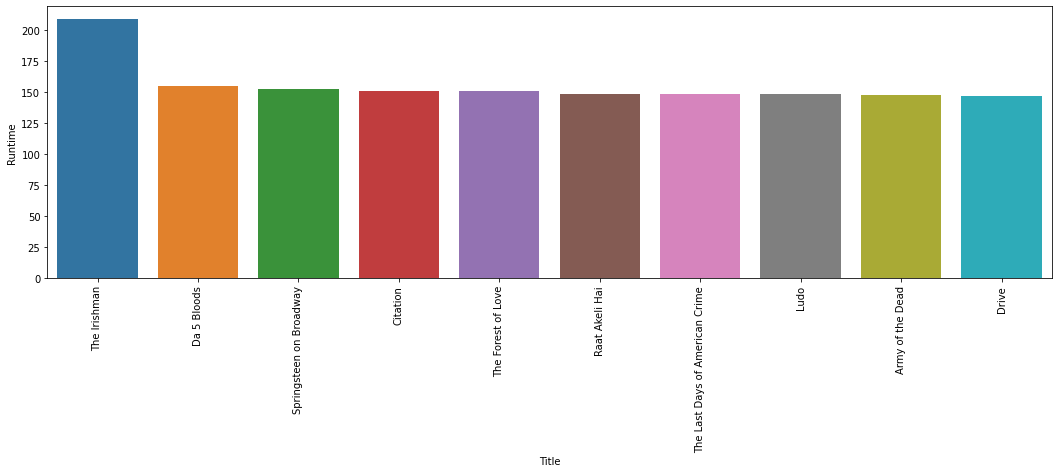

In [ ]:
plt.figure(figsize = (18,5))
sns.barplot('Title' , 'Runtime' , data = sorted_df_runtime)
plt.xticks(rotation  = 90)
plt.show()

##### **In which year was the most movies released? Visualize it.**

In [ ]:
print(dataset['Premiere'].value_counts())
print("-"*40)
print('En fazla yayımlanmış film: ', dataset['Premiere'].mode()[0])

October 2, 2020       6
November 1, 2019      5
October 18, 2019      5
November 2, 2018      4
June 19, 2020         4
                     ..
September 20, 2019    1
March 10, 2017        1
March 17, 2017        1
May 29, 2015          1
October 4, 2020       1
Name: Premiere, Length: 390, dtype: int64
----------------------------------------
En fazla yayımlanmış film:  October 2, 2020


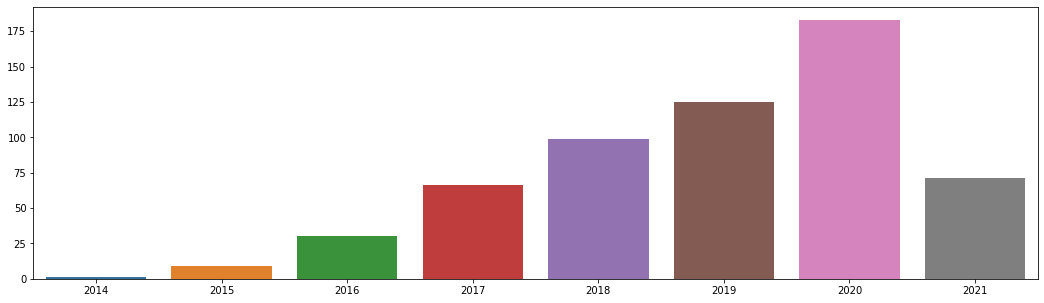

In [ ]:
df['Year'] = df['Date'].dt.year
plt.figure(figsize  = (18,5))
sns.barplot(df['Year'].value_counts().index ,df['Year'].value_counts().values , data = df)
plt.show()

##### **Which language movies have the lowest average IMBD ratings? Visualize it.**

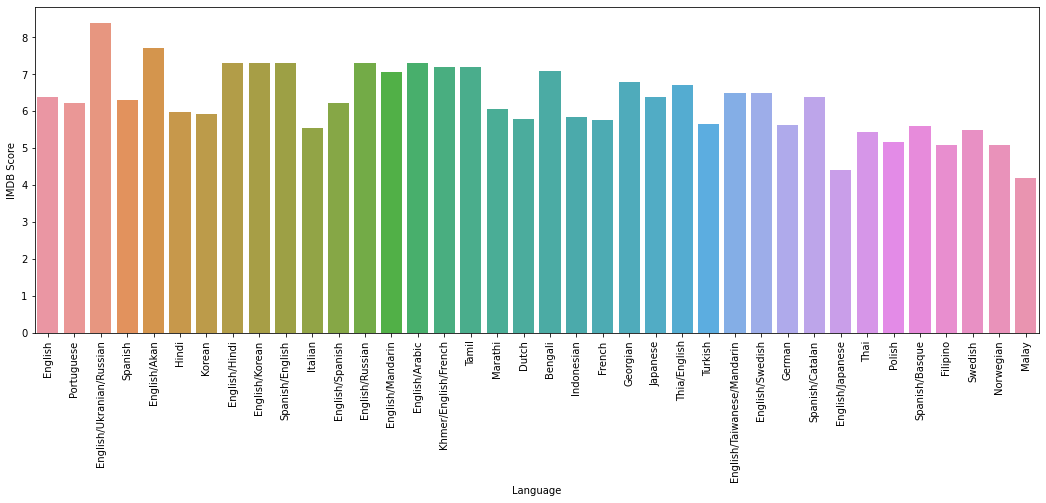

In [ ]:
plt.figure(figsize = (18,6))
sorted_df = dataset.sort_values('IMDB Score' , ascending=False)
sns.barplot('Language' , 'IMDB Score' , data = sorted_df , ci = None)
plt.xticks(rotation  = 90)
plt.show()


*When we analyze the chart, ``Malay , English/Japanse and Italian`` are the top three languages ​​with the lowest imbd score.*

In [ ]:
● Which year has the greatest total runtime?

● What is the "Genre" where each language is used the most?

● Is there outlier data in the data set? Please explain

##### **Which year has the greatest total runtime?**

In [ ]:
# # The year has the greatest total runtime
runtime_df = df.groupby("Year" ,as_index=False).agg({"Runtime": "sum"}).sort_values(by="Runtime", ascending=False)
runtime_df[:1]

,Year,Runtime
6,2020,17384


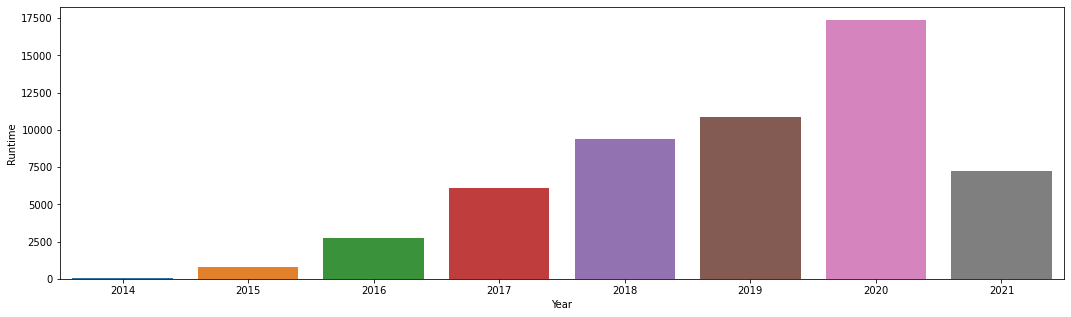

In [ ]:
# The all years has the greatest total runtime
plt.figure(figsize = (18,5))
sns.barplot(x = 'Year' , y = 'Runtime' , data = runtime_df)
plt.show()

##### **What is the "Genre" where each language is used the most?**

In [ ]:
dataset.groupby('Language')['Genre'].value_counts(sort = True)

Language      Genre          
Bengali       Documentary          1
Dutch         Crime drama          1
              Fantasy              1
              Romantic comedy      1
English       Documentary        120
                                ... 
Thai          Horror               1
Thia/English  Documentary          1
Turkish       Comedy               2
              Drama                2
              Romance              1
Name: Genre, Length: 204, dtype: int64

In [ ]:
multi_index = dataset.groupby('Language')['Genre'].value_counts(sort = True)
new_dataset = pd.DataFrame(index = multi_index.index , columns = ['counts'] , data = multi_index.values)
new_dataset = new_dataset.reset_index()

# Show plot
px.scatter(new_dataset, y= 'counts', x='Language', color='Genre')

*We can examine the number of genres used by each language in our chart.*

##### **Is there outlier data in the data set? Please explain**


There are more than one method to detect outlier data. If it is necessary to mention these methods;
* Box Plot
* Scatter Plot
* Standard Deviation
* IQR Score

are methods.


##### Box Plot

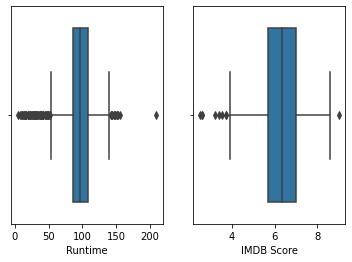

In [ ]:
fig, axs = plt.subplots(ncols=2)
sns.boxplot(dataset['Runtime'], ax = axs[0])
sns.boxplot(dataset['IMDB Score'], ax = axs[1])
plt.show()

*When we want to perform outlier analysis on the boxplot graph, we see that some values ​​are quite high. However, this height does not always mean outlier. For this data set, the outlier value is calculated because the IMDB Score independent variable specifies a score and we know that the score value can be at most 10. In the same way, since the Runtime argument also indicates the duration of the movies made, values ​​that are far from the others do not mean outliers for us.*

##### *Scatter Plot*

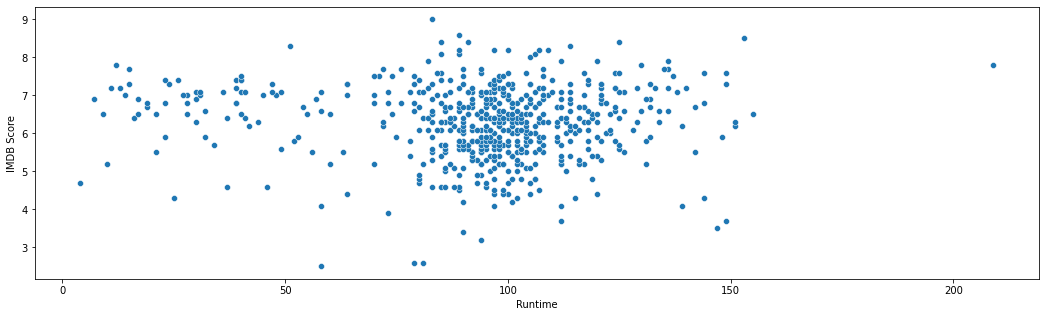

In [8]:
plt.figure(figsize = (18,5))
sns.scatterplot(x = 'Runtime' , y = 'IMDB Score' , data = dataset)
plt.show()

*When we examine the graph, it gives the same results as Box Plot. The x-axis includes Runtime values, while the y-axis includes IMDB Score. Here, we can take the Runtime period as an outlier, but since we know that this is a movie duration, such a value can be considered normal, in this respect, it is considered as contradictory data. we won't.*

##### Standart Deviation

İf a value has a distance to the average higher than **factor * stardant deviation** , it can be assumed as an outlier.

Usually , a **factor** between 2 and 4 seems practical.

In [66]:
def check_outlier(feature, upper_lim , lower_lim):
  boolean = False
  if(dataset[(dataset[str(feature)] > upper_lim) | (dataset[str(feature)] <  lower_lim)].any(axis = None)):
    boolean = True
  return boolean

factor = 3

# Runtime
upper_lim_runtime = np.abs(dataset['Runtime'].mean() + dataset['Runtime'].std() * factor)
lower_lim_runtime = np.abs(dataset['Runtime'].mean() - dataset['Runtime'].std() * factor)

# IMDB Score
upper_lim_imdb = dataset['IMDB Score'].mean() + dataset['IMDB Score'].std() * factor
lower_lim_imdb = dataset['IMDB Score'].mean() - dataset['IMDB Score'].std() * factor

runtime_check = check_outlier('Runtime' , upper_lim_runtime , lower_lim_runtime)
imdb_score_check = check_outlier('IMDB Score' , upper_lim_imdb , lower_lim_imdb)

print(runtime_check)
print(imdb_score_check)

True
True


##### Z-Score

In [77]:
from scipy import stats
import numpy as np

z_score = np.abs(stats.zscore(dataset['Runtime']))
threshold = 3 
np.where(z_score > threshold)

(array([ 40,  66, 325, 417, 561]),)

##### *IQR Score*

In [67]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    Q1 = dataframe[col_name].quantile(q1)
    Q3 = dataframe[col_name].quantile(q3)
    IQR = Q3 - Q1
    up_limit = Q3 + 1.5 * IQR
    low_limit = Q1 - 1.5 * IQR
    return low_limit, up_limit


def check_outlier_iqr(dataframe, col_name, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

print(check_outlier_iqr(dataset , 'Runtime'))
print(check_outlier_iqr(dataset , 'IMDB Score'))

True
True
